<h1>Complete tasks using Pandas</h1>

In [9]:
import string
import random
import pandas as pd
import numpy as np

df = pd.read_csv('./NationalNames.csv')

<h2>1. Виведіть перші 8 рядків набору даних.</h2>

In [10]:
df[:8]


,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
5,6,Margaret,1880,F,1578
6,7,Ida,1880,F,1472
7,8,Alice,1880,F,1414


<h2>2. Вивести останні 8 рядків набору даних.</h2>

In [11]:
df[-8:]

,Id,Name,Year,Gender,Count
1825425,1825426,Zo,2014,M,5
1825426,1825427,Zyeir,2014,M,5
1825427,1825428,Zyel,2014,M,5
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5
1825432,1825433,Zyrin,2014,M,5


<h2>3. Отримайте імена стовпців набору даних</h2>

In [13]:
df.columns

Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')

<h2>5. Знайдіть кількість унікальних імен у наборі даних</h2>

In [15]:
df['Name'].nunique()

93889

<h2>10. Підрахуйте кількість унікальних імен у кожному році</h2>

In [16]:
df.groupby('Year')['Name'].nunique().head()

Year
1880    1889
1881    1830
1882    2012
1883    1962
1884    2158
Name: Name, dtype: int64

<h2>11. Знайдіть рік із найбільшою кількістю унікальних імен.</h2>

In [17]:
df.groupby('Year')['Name'].nunique().sort_values(ascending=False).head(1)

Year
2008    32488
Name: Name, dtype: int64

<h2>12. Знайдіть найпопулярніше ім’я в році з найбільшою кількістю
унікальних імен (тобто у 2008 році)</h2>

In [18]:
year_max_unique = df.groupby('Year')['Name'].nunique().idxmax()
df[df['Year'] == year_max_unique].sort_values('Count', ascending=False).iloc[0]['Name']

'Jacob'

<h2>13. Знайдіть рік, коли ім’я “Jacob” було найпопулярнішим серед
жіночих імен</h2>

In [30]:
female_df = df[df['Gender'] == 'F']
jacob_df = female_df[female_df['Name'] == 'Jacob']
jacob_df.sort_values('Count', ascending=False).head(1)

,Id,Name,Year,Gender,Count
1455556,1455557,Jacob,2004,F,171


<h2>14. Знайти рік із найбільшою кількістю гендерно нейтральних імен
(однакові чоловічі та жіночі імена)</h2>

In [29]:
male_names = df[df['Gender'] == 'M'].groupby(['Year', 'Name'])['Count'].sum()
female_names = df[df['Gender'] == 'F'].groupby(['Year', 'Name'])['Count'].sum()
gender_neutral_names = male_names.index.intersection(female_names.index)
male_names = male_names.loc[gender_neutral_names]
gender_neutral_counts = male_names.groupby(level=0).count()
gender_neutral_counts.sort_values(ascending=False).head(1)

Year
2008    2557
Name: Count, dtype: int64

<h2>15. Знайдіть загальну кількість народжень за рік.</h2>

In [31]:
df.groupby('Year')['Count'].sum().head()

Year
1880    201484
1881    192699
1882    221538
1883    216950
1884    243467
Name: Count, dtype: int64

<h2>16. Знайдіть рік, коли народилося найбільше дітей</h2>

In [32]:
df.groupby('Year')['Count'].sum().idxmax()

1957

<h2>17. Знайдіть кількість дівчаток та хлопчиків, які народились кожного</h2>

In [33]:
df.groupby(['Year', 'Gender'])['Count'].sum().unstack().head()

Gender,F,M
Year,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445


<h2>18. Підрахуйте кількість років, коли дівчаток народжувалось більше,
ніж хлопчиків.</h2>

In [34]:
boys_girls_count = df.groupby(['Year', 'Gender'])['Count'].sum().unstack()
boys_girls_count[boys_girls_count['F'] > boys_girls_count['M']].shape[0]

54

<h2>21. Порахуйте, скільки разів хлопчиків називали Barbara</h2>

In [35]:
df[(df['Name'] == 'Barbara') & (df['Gender'] == 'M')]['Count'].sum()

4139

<h2>22. Підрахуйте скільки років проводилось спостереження</h2>

In [38]:
num_of_years = len(df['Year'].unique())
print(f"Спостереження проводились {num_of_years} років.")

Спостереження проводились 135 років.


<h2>23. Знати найпопулярніші гендерно-нейтральні імена (ті, що присутні
кожного року)</h2>

In [39]:
num_of_years = len(df['Year'].unique())
male_names = df[df['Gender'] == 'M'].groupby(['Name'])['Count'].sum()
female_names = df[df['Gender'] == 'F'].groupby(['Name'])['Count'].sum()
gender_neutral_names = male_names.index.intersection(female_names.index)
popular_gender_neutral_names = df[df['Name'].isin(gender_neutral_names)].groupby('Name').filter(lambda x: x['Year'].nunique() == num_of_years)['Name'].unique()
pd.DataFrame(data=popular_gender_neutral_names)

,0
0,Mary
1,Anna
2,Emma
3,Elizabeth
4,Minnie
...,...
818,Noble
819,Rupert
820,Thad
821,Kelly


<h2>24. Знайти найпопулярніше серед непопулярних імен (непопулярне
ім’я, яким називали дітей найбільшу кількість разів )</h2>

In [54]:
years_threshold = 50
unpopular_names = df.groupby('Name').filter(lambda x: x['Year'].nunique() < years_threshold).groupby('Name')['Count'].sum()
unpopular_name = unpopular_names.sort_values(ascending=False).head(1)
f"Найпопулярніше ім'я серед непопулярних (названих менш ніж за {years_threshold} років) - {unpopular_name.index[0]}, {unpopular_name.values[0]} разів."

"Найпопулярніше ім'я серед непопулярних (названих менш ніж за 50 років) - Jayden, 189220 разів."

<h2>26. Побудувати графіки розподілення кількості жіночих імен John та
чоловічих імен Mary по роках.</h2>

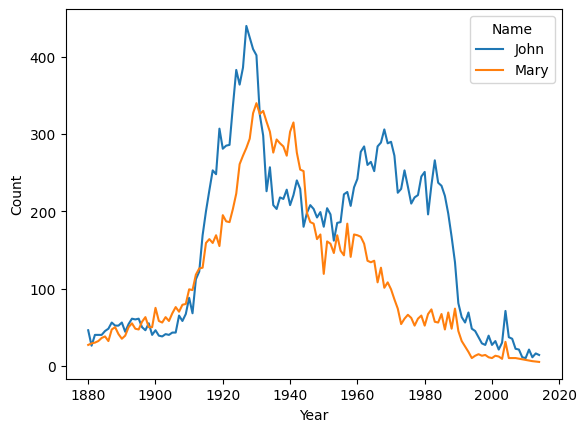

In [45]:
import matplotlib.pyplot as plt

john_data = df[(df['Name'] == 'John') & (df['Gender'] == 'F')]
mary_data = df[(df['Name'] == 'Mary') & (df['Gender'] == 'M')]

plt.plot(john_data['Year'], john_data['Count'], label='John')
plt.plot(mary_data['Year'], mary_data['Count'], label='Mary')

plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Name')

plt.show()